<a href="https://colab.research.google.com/github/AndrzejOlejniczak/AndrzejOlejniczak/blob/main/BER001_02_Land_Cover_data_preparation_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERI_001 - Mapping Informal Green Spaces 
### Notebook 02: Creating training samples of geospatial data.
<p> This notebook presents a method to slice GeoTiff files into a dataset that can be used to train a DNN.

1. Prepare the environment.
2. Load and inspect the raster dataset.
3. Downsample the dataset.
3. Rasterize vector data into label ready - form.

References:
<p>Based on:  https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/intro-to-the-geotiff-file-format/

and 

https://gis.stackexchange.com/questions/285499/how-to-split-multiband-image-into-image-tiles-using-rasterio


# 1. Prepare the environment

In [ ]:
!pip install rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 88.7 MB/s eta 0:00:00


In [ ]:
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 22.6 MB/s eta 0:00:00


# 2. Load and inspect the raster dataset.

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt


In [ ]:
# Define the path to the file
fp = r'/content/drive/MyDrive/Colab Notebooks/Land Cover Data Preparation/73019_868112_N-34-139-A-c-2-3.tif'

In [ ]:
# Open the dataset
img = rasterio.open(fp)

<AxesSubplot:>

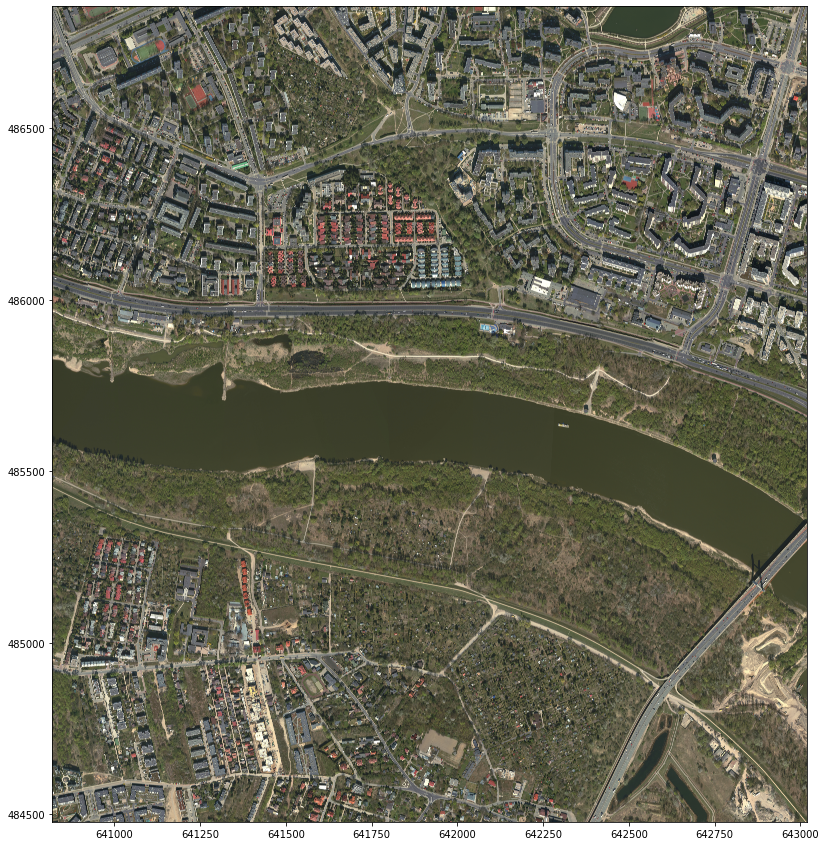

In [ ]:
# Plot the data
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
show(img, ax=ax)

In [ ]:
img.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 22004, 'height': 23773, 'count': 3, 'crs': CRS.from_wkt('PROJCS["Projection: Transverse Mercator; Datum: WGS84; Ellipsoid: WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",19],PARAMETER["scale_factor",0.9993],PARAMETER["false_easting",500000],PARAMETER["false_northing",-5300000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(0.1, 0.0, 640817.7000001776,
       0.0, -0.1, 486855.5999991745), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'jpeg', 'interleave': 'pixel', 'photometric': 'ycbcr'}

In [ ]:
img.shape, img.crs

((23773, 22004),
 CRS.from_wkt('PROJCS["Projection: Transverse Mercator; Datum: WGS84; Ellipsoid: WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",19],PARAMETER["scale_factor",0.9993],PARAMETER["false_easting",500000],PARAMETER["false_northing",-5300000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'))

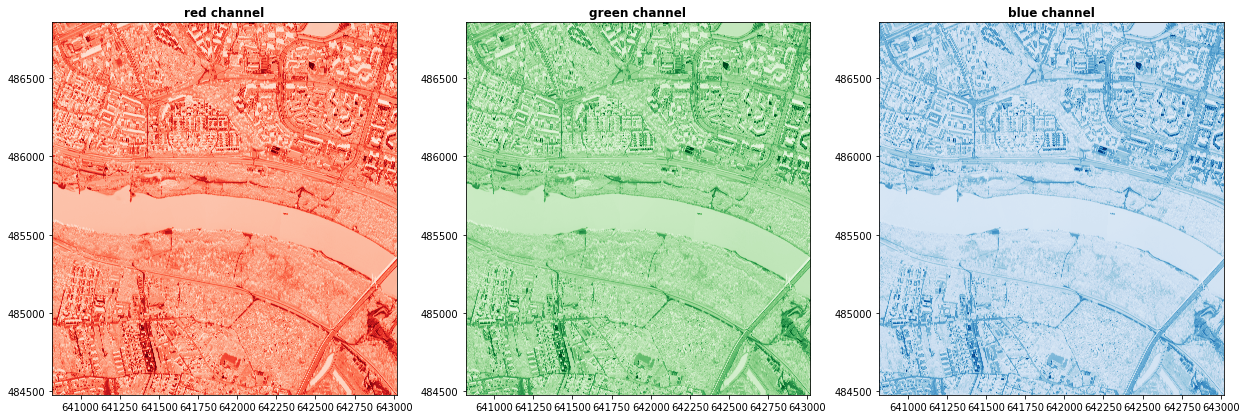

In [ ]:
# Plot color chanels of the raster dataset
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))

show((img, 1), ax=axr, cmap='Reds', title='red channel')

show((img, 2), ax=axg, cmap='Greens', title='green channel')

show((img, 3), ax=axb, cmap='Blues', title='blue channel')


plt.show()

In [ ]:
img.block_shapes

[(256, 256), (256, 256), (256, 256)]

In [ ]:
img.block_windows

<function DatasetReader.block_windows>

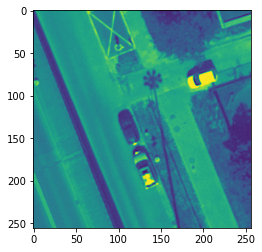

((0, 0), (256, 256), (256, 256), (256, 256))


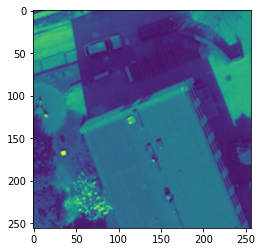

((0, 1), (256, 256), (256, 256), (256, 256))


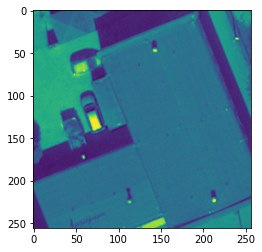

((0, 2), (256, 256), (256, 256), (256, 256))


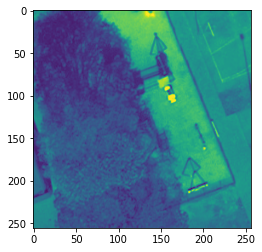

((0, 3), (256, 256), (256, 256), (256, 256))


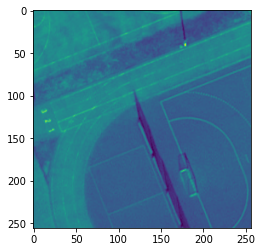

((0, 4), (256, 256), (256, 256), (256, 256))


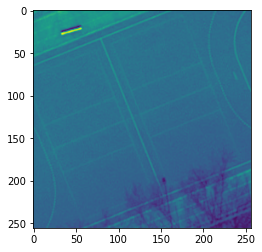

((0, 5), (256, 256), (256, 256), (256, 256))


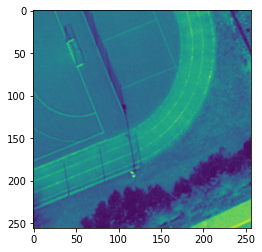

((0, 6), (256, 256), (256, 256), (256, 256))


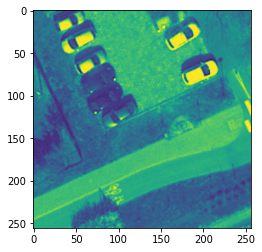

((0, 7), (256, 256), (256, 256), (256, 256))


In [ ]:
# Check block windows
for it, (ji, window) in enumerate(img.block_windows(1)):
  b, g, r = (img.read(k, window=window) for k in (1, 2, 3))
  show(b)
  print((ji, r.shape, g.shape, b.shape))
  if it == 7:
    break


# 3. Downsample the dataset.
(It may be necessary to downsample GIS data for pipeline optimization)

References:
<p> https://pygis.io/docs/e_raster_resample.html

In [ ]:
from rasterio.enums import Resampling

image = "/content/drive/MyDrive/Colab Notebooks/Land Cover Data Preparation/73019_868112_N-34-139-A-c-2-3.tif"

downscale_factor = 0.25

with rasterio.open(image) as dataset:

    # resample data to target shape using upscale_factor
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * downscale_factor),
            int(dataset.width * downscale_factor)
        ),
        resampling=Resampling.bilinear
    )

    print('Shape before resample:', dataset.shape)
    print('Shape after resample:', data.shape[1:])

    # scale image transform
    dst_transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )

    print('Transform before resample:\n', dataset.transform, '\n')
    print('Transform after resample:\n', dst_transform)

    ## Write outputs
    # set properties for output
    dst_kwargs = dataset.meta.copy()
    dst_kwargs.update(
        {
            "crs": dataset.crs,
            "transform": dst_transform,
            "width": data.shape[-1],
            "height": data.shape[-2],
            "nodata": 0,  
        }
    )

    with rasterio.open("73019_868112_N-34-139-A-c-2-3_025.tif", "w", **dst_kwargs) as dst:
        # iterate through bands
        for i in range(data.shape[0]):
              dst.write(data[i].astype(rasterio.uint32), i+1)


Shape before resample: (23773, 22004)
Shape after resample: (5943, 5501)
Transform before resample:
 | 0.10, 0.00, 640817.70|
| 0.00,-0.10, 486855.60|
| 0.00, 0.00, 1.00| 

Transform after resample:
 | 0.40, 0.00, 640817.70|
| 0.00,-0.40, 486855.60|
| 0.00, 0.00, 1.00|


# 4. Slice the dataset into 512x512px GeoTiff files

In [ ]:
import os
from itertools import product
import rasterio as rio
from rasterio import windows

in_path = '/content/'
input_filename = '73019_868112_N-34-139-A-c-2-3_025.tif'

img_heigth = 512
img_width = 512

out_path = ''
output_filename = 'tile_{}-{}.tif'

def get_tiles(ds, width=img_width, height=img_heigth):
    nols, nrows = ds.meta['width'], ds.meta['height']
    offsets = product(range(0, nols, width), range(0, nrows, height))
    big_window = windows.Window(col_off=0, row_off=0, width=nols, height=nrows)
    for col_off, row_off in  offsets:
        window =windows.Window(col_off=col_off, row_off=row_off, width=width, height=height).intersection(big_window)
        transform = windows.transform(window, ds.transform)
        yield window, transform


with rio.open(os.path.join(in_path, input_filename)) as inds:
    tile_width, tile_height = img_width, img_heigth

    meta = inds.meta.copy()

    for window, transform in get_tiles(inds):
        meta['transform'] = transform
        meta['width'], meta['height'] = window.width, window.height
        outpath = os.path.join(out_path,output_filename.format(int(window.col_off), int(window.row_off)))
        with rio.open(outpath, 'w', **meta) as outds:
            outds.write(inds.read(window=window))

### Inspect newly created data

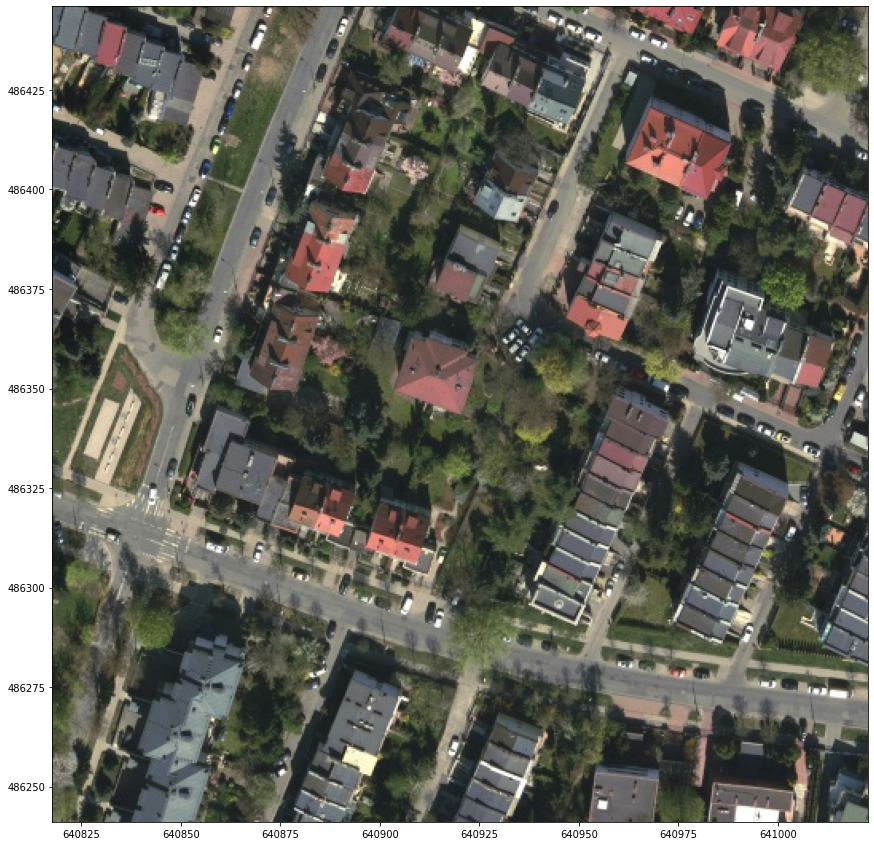

In [ ]:
fp2 = r'/content/tile_0-1024.tif'
img2 = rasterio.open(fp2)

# Plot the data
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
show(img2, ax=ax)
plt.show()

In [ ]:
img2.crs

CRS.from_wkt('PROJCS["Projection: Transverse Mercator; Datum: WGS84; Ellipsoid: WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",19],PARAMETER["scale_factor",0.9993],PARAMETER["false_easting",500000],PARAMETER["false_northing",-5300000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [ ]:
img2.bounds

BoundingBox(left=640817.7000001776, bottom=486241.1741536419, right=641022.5000001776, top=486445.98276881943)